In [ ]:
# Importar las bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import random
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.impute import SimpleImputer

In [ ]:
# Cargar los datos
file_path = '/content/drive/MyDrive/Métodos gran escala/Tarea 1/train.csv'
data = pd.read_csv(file_path)


In [ ]:
# Head
print(data.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [ ]:
# info
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

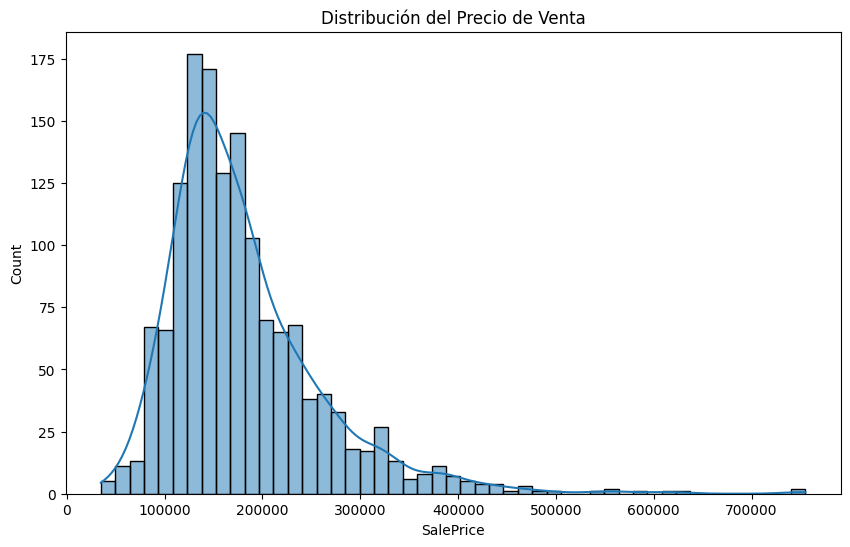

In [ ]:
# Histograma de la variable objetivo
plt.figure(figsize=(10, 6))
sns.histplot(data['SalePrice'], kde=True)
plt.title('Distribución del Precio de Venta')
plt.show()

<ipython-input-6-b707c5c16c07>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


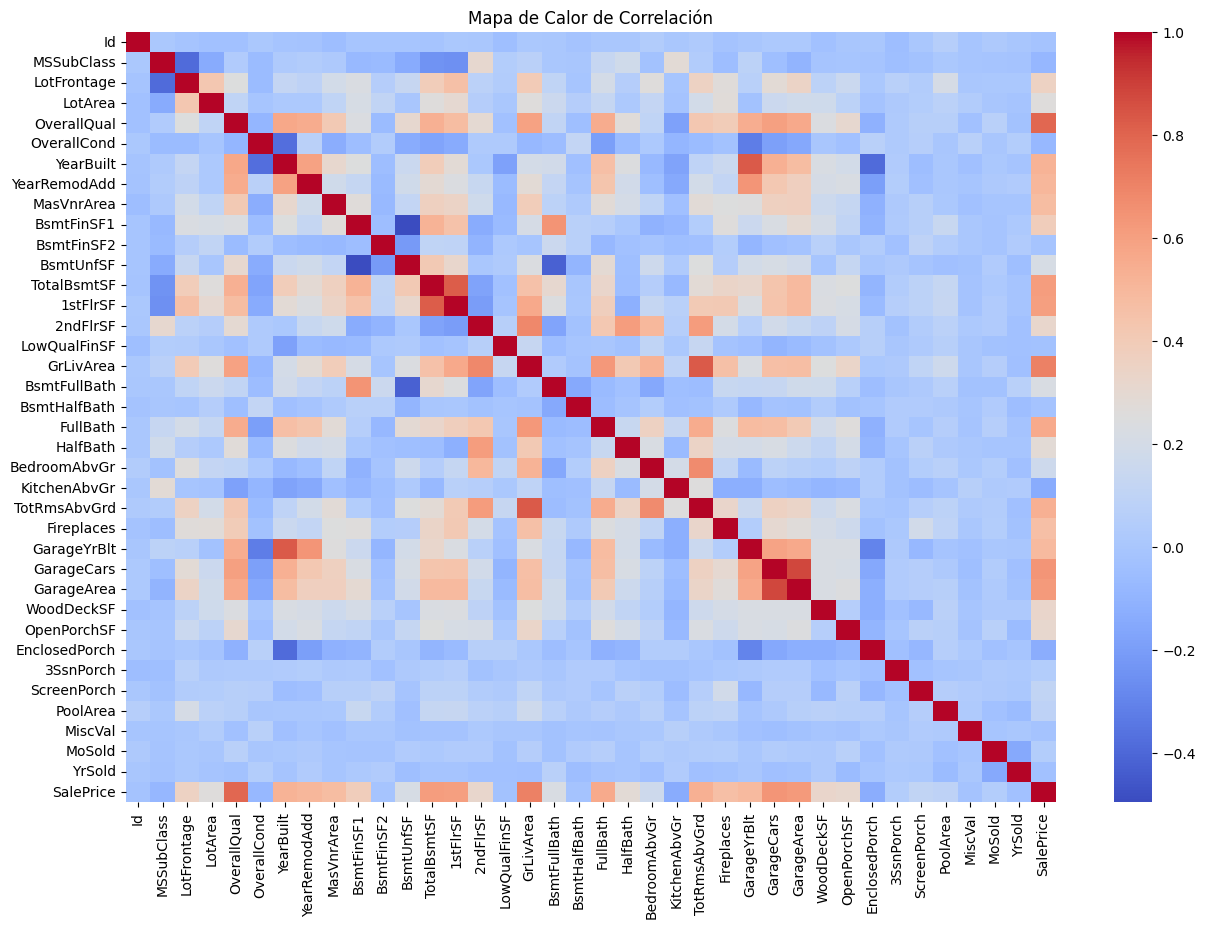

In [ ]:
# Mapa de calor para visualizar la correlación
corr_matrix = data.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('Mapa de Calor de Correlación')
plt.show()

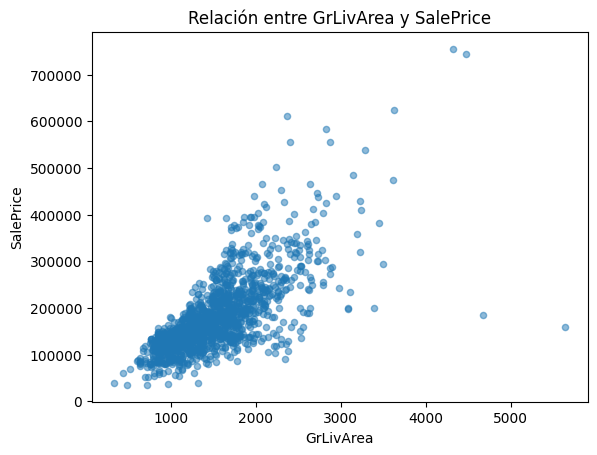

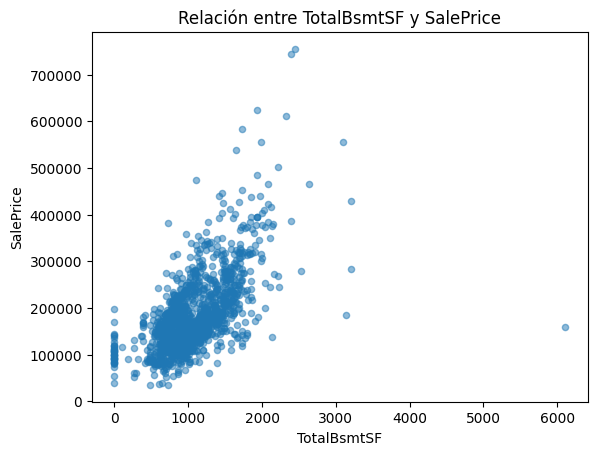

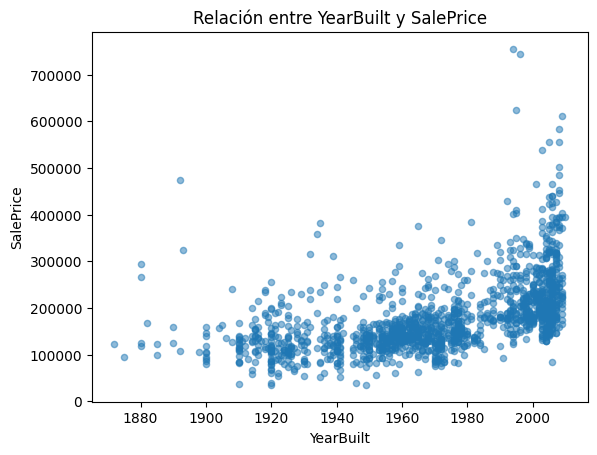

In [ ]:
# Gráfico de dispersión para variables seleccionadas y SalePrice
selected_features = ['GrLivArea', 'TotalBsmtSF', 'YearBuilt']
for feature in selected_features:
    data.plot(kind='scatter', x=feature, y='SalePrice', alpha=0.5)
    plt.title(f'Relación entre {feature} y SalePrice')
    plt.show()

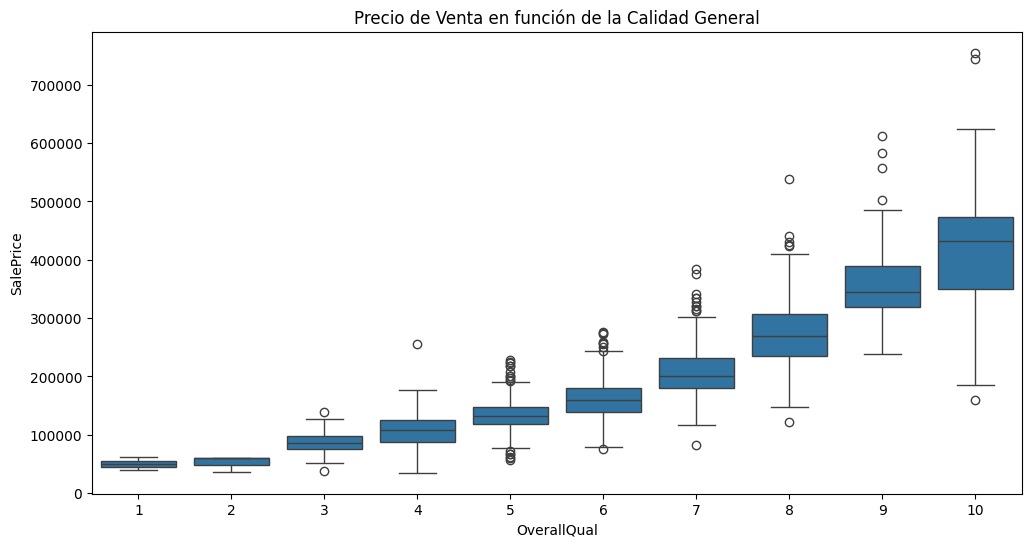

In [ ]:
# Boxplot para analizar la relación entre la calidad general y el precio de venta
plt.figure(figsize=(12, 6))
sns.boxplot(x='OverallQual', y='SalePrice', data=data)
plt.title('Precio de Venta en función de la Calidad General')
plt.show()

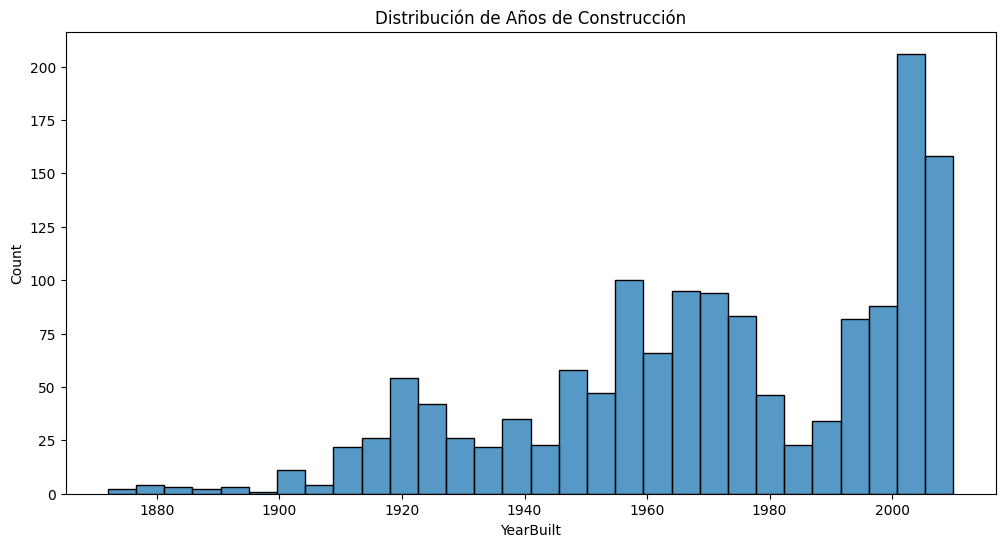

In [ ]:
# Distribución de años de construcción
plt.figure(figsize=(12, 6))
sns.histplot(data['YearBuilt'], kde=False, bins=30)
plt.title('Distribución de Años de Construcción')
plt.show()

<ipython-input-10-edd1be0add13>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


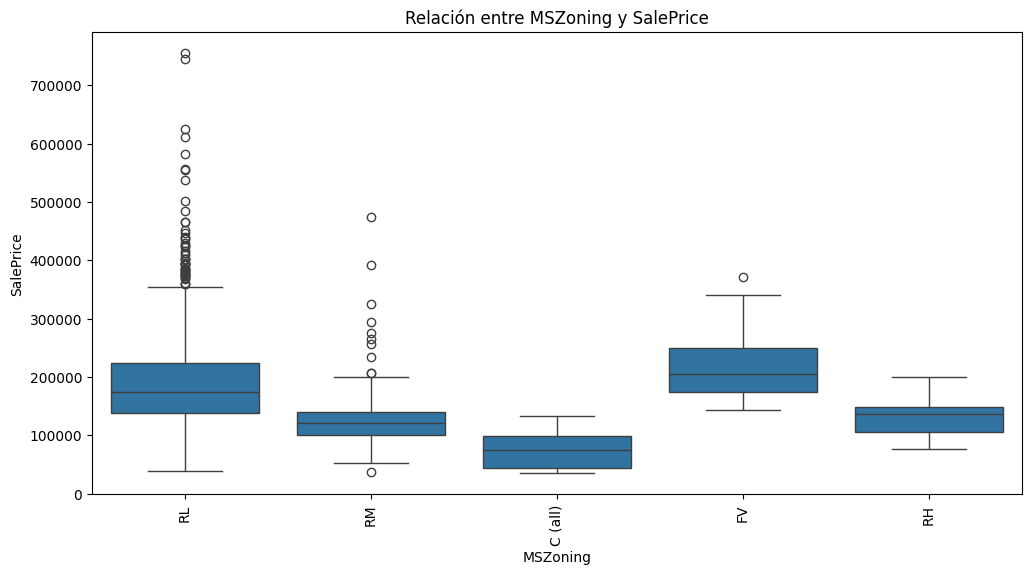

<ipython-input-10-edd1be0add13>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


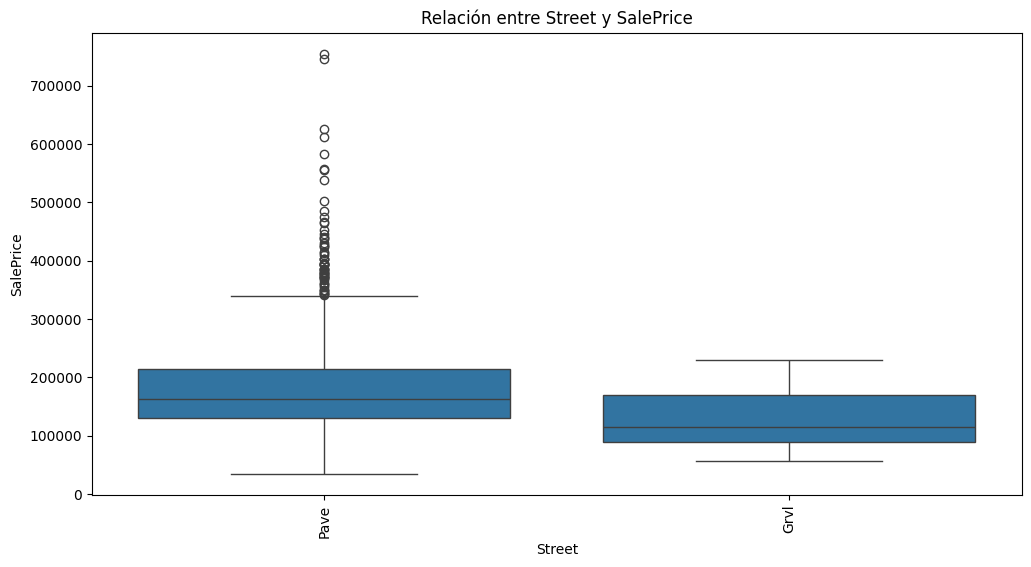

<ipython-input-10-edd1be0add13>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


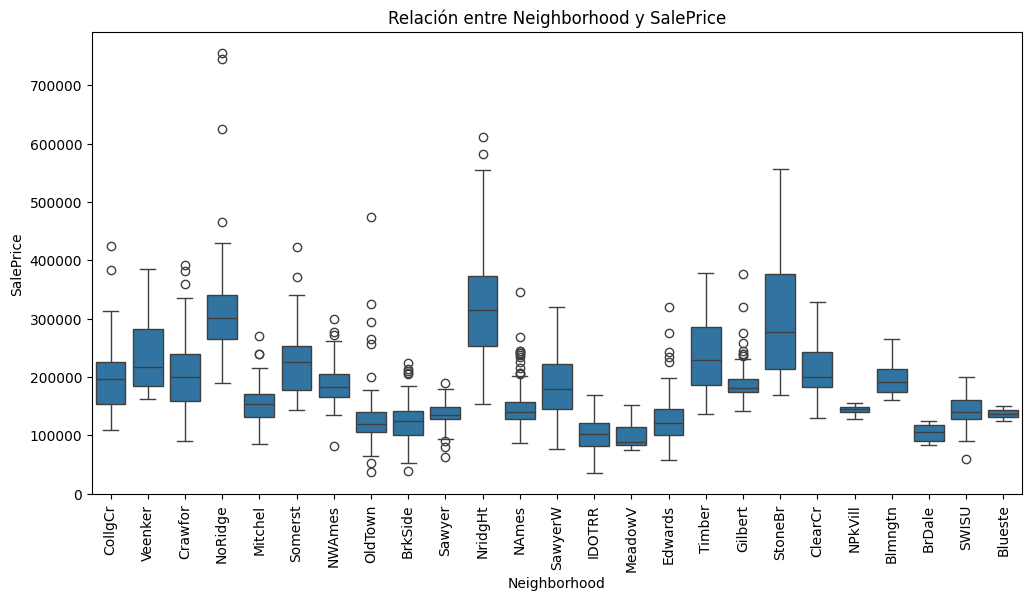

In [ ]:
# Relación entre SalePrice y características categóricas importantes
categorical_features = ['MSZoning', 'Street', 'Neighborhood']
for feature in categorical_features:
    plt.figure(figsize=(12, 6))
    ax = sns.boxplot(x=feature, y='SalePrice', data=data)
    plt.title(f'Relación entre {feature} y SalePrice')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    plt.show()

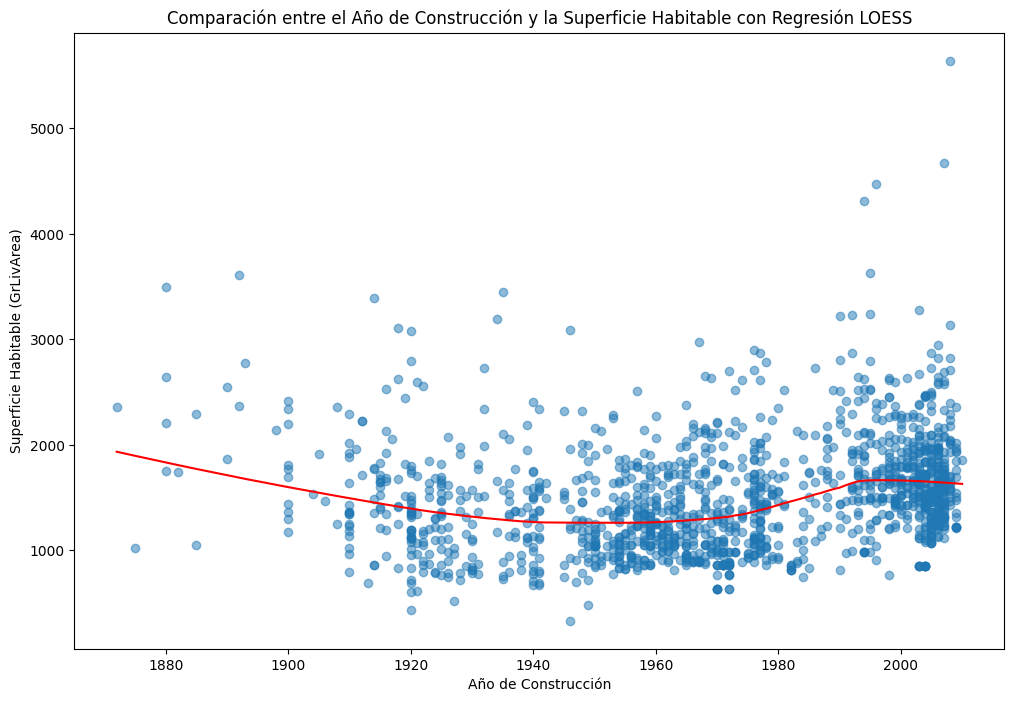

In [ ]:
# Calcular los valores ajustados con LOESS
lowess = sm.nonparametric.lowess
z = lowess(data['GrLivArea'], data['YearBuilt'], frac=0.45)

# Crear un gráfico de dispersión con la curva LOESS
plt.figure(figsize=(12, 8))
plt.scatter(data['YearBuilt'], data['GrLivArea'], alpha=0.5)
plt.plot(z[:,0], z[:,1], color='red')  # Curva LOESS
plt.title('Comparación entre el Año de Construcción y la Superficie Habitable con Regresión LOESS')
plt.xlabel('Año de Construcción')
plt.ylabel('Superficie Habitable (GrLivArea)')
plt.show()


<Figure size 1500x800 with 0 Axes>

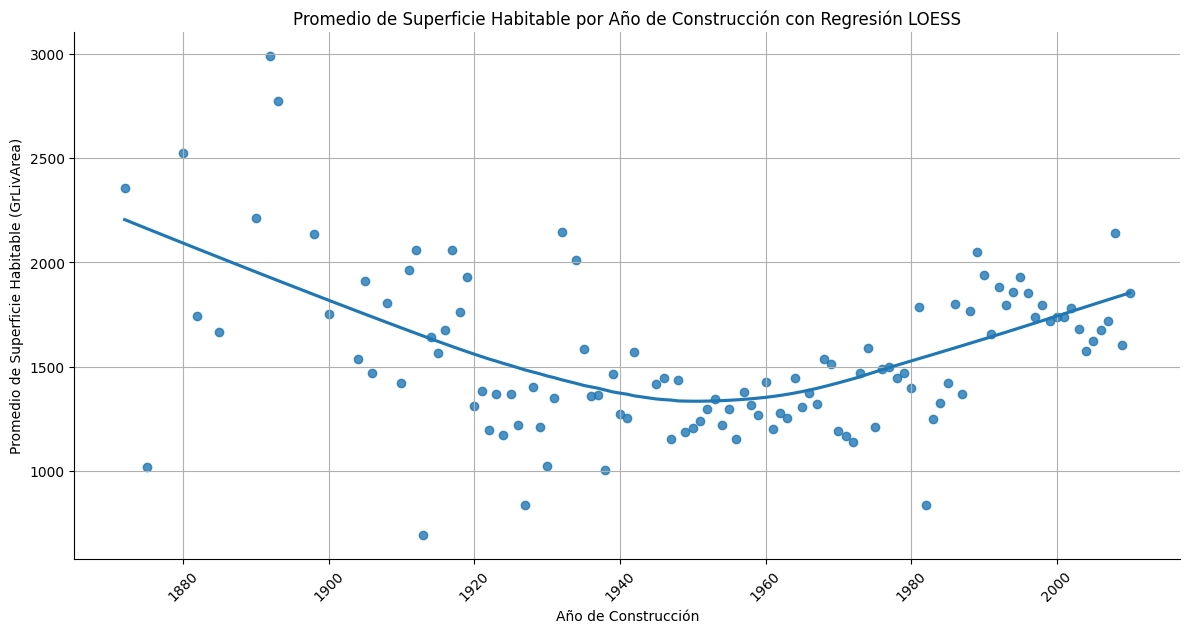

In [ ]:
# Calcular el promedio de superficie habitable por año de construcción
avg_surface_by_year = data.groupby('YearBuilt')['GrLivArea'].mean().reset_index()

# Crear un gráfico con una regresión LOESS
plt.figure(figsize=(15, 8))
sns.lmplot(x='YearBuilt', y='GrLivArea', data=avg_surface_by_year, lowess=True, aspect=2, height=6)
plt.title('Promedio de Superficie Habitable por Año de Construcción con Regresión LOESS')
plt.xlabel('Año de Construcción')
plt.ylabel('Promedio de Superficie Habitable (GrLivArea)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [ ]:
data = data.select_dtypes(include=[np.number]).fillna(data.mean())
scaler = StandardScaler()
X = scaler.fit_transform(data.drop('SalePrice', axis=1))
y = data['SalePrice']

<ipython-input-13-5bf758949d4a>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.select_dtypes(include=[np.number]).fillna(data.mean())


Mean Squared Error: 1359541501.9415474


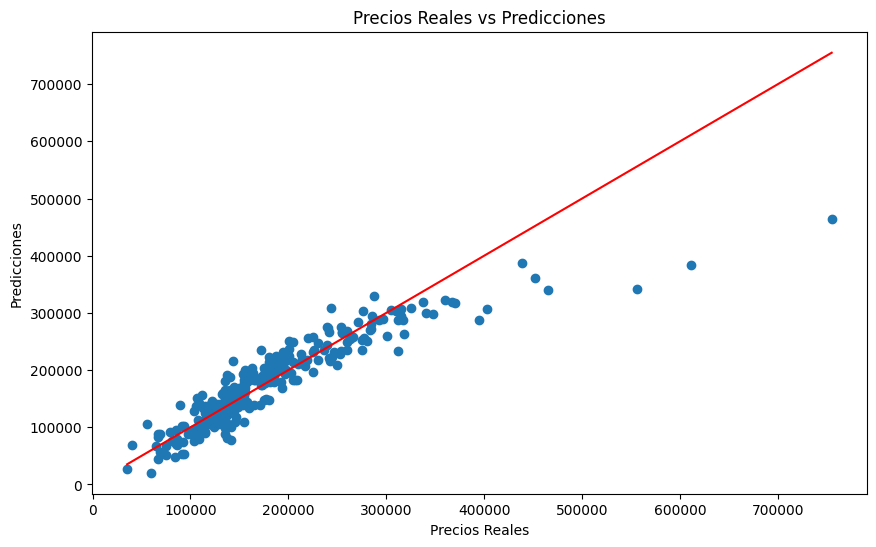

Predicción de precio: 153833.16629454045


In [ ]:

# Construcción del Modelo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluación del Modelo
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Gráfica de dispersión real vs predicción
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Precios Reales")
plt.ylabel("Predicciones")
plt.title("Precios Reales vs Predicciones")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r')
plt.show()

# Ejemplo de inferencia
sample_data = X_test[0]
sample_prediction = model.predict([sample_data])
print(f"Predicción de precio: {sample_prediction[0]}")


In [ ]:
# Correlación de variables
file_path = '/content/drive/MyDrive/Métodos gran escala/Tarea 1/train.csv'
data = pd.read_csv(file_path)

# Calcular la matriz de correlación
corr_matrix = data.corr()

# Obtener la correlación con SalePrice y ordenar
correlation_with_saleprice = corr_matrix['SalePrice'].sort_values(ascending=False)

# Imprimir las correlaciones ordenadas
print(correlation_with_saleprice)


SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

<ipython-input-18-428480e18f88>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


Mean Squared Error: 1260708852.6222663


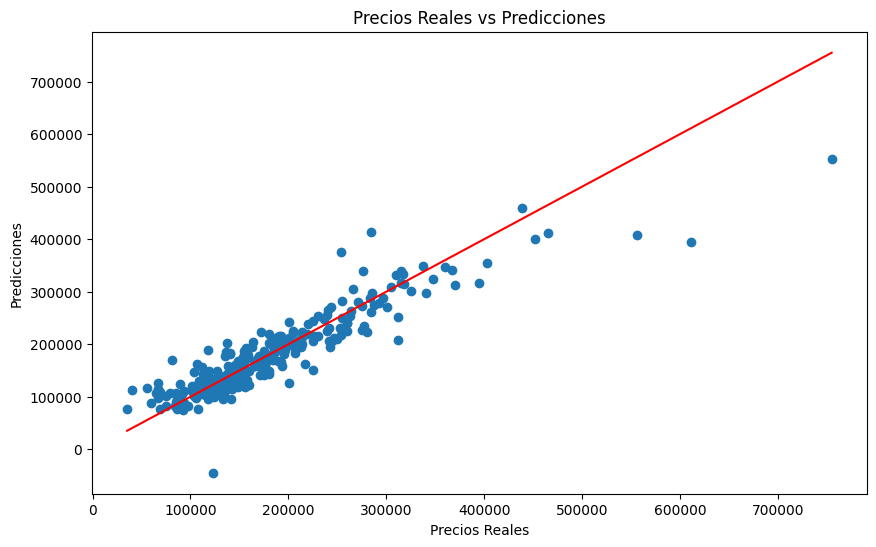

In [ ]:
# Seleccionar las características y la variable objetivo
selected_features = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF']
X = data[selected_features]
y = data['SalePrice']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear características polinomiales
degree = 2  # Puedes cambiar el grado según sea necesario
poly_features = PolynomialFeatures(degree=degree, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Construir y entrenar el modelo
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Evaluar el modelo
y_pred = model.predict(X_test_poly)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Gráfica de dispersión real vs predicción
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Precios Reales")
plt.ylabel("Predicciones")
plt.title("Precios Reales vs Predicciones")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r')
plt.show()


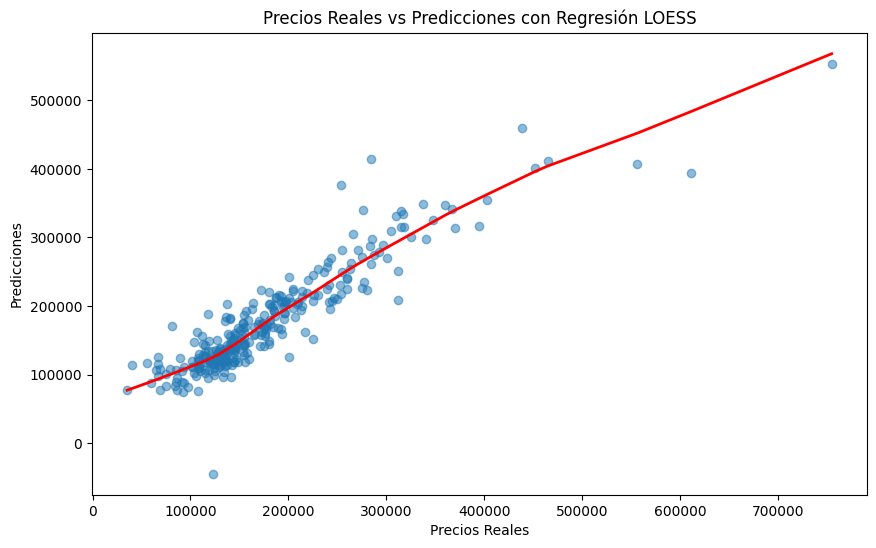

In [ ]:
# Crear un DataFrame para visualización
df = pd.DataFrame({
    'Real': y_test,
    'Predicted': y_pred
})

# Ordenar los valores para el trazado
df.sort_values('Real', inplace=True)

# Calcular los valores ajustados con LOESS
lowess = sm.nonparametric.lowess
z = lowess(df['Predicted'], df['Real'], frac=0.7)

# Gráfica de dispersión real vs predicción con LOESS
plt.figure(figsize=(10, 6))
plt.scatter(df['Real'], df['Predicted'], alpha=0.5)
plt.plot(z[:, 0], z[:, 1], color='red', lw=2)
plt.xlabel("Precios Reales")
plt.ylabel("Predicciones")
plt.title("Precios Reales vs Predicciones con Regresión LOESS")
plt.show()

In [ ]:
# Características seleccionadas
features = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF']

# Inicialización aleatoria de valores por defecto
default_values = {
    'OverallQual': random.randint(1, 10),    # Calidad general (1-10)
    'GrLivArea': random.randint(500, 4000),  # Área habitable en pies cuadrados
    'GarageCars': random.randint(0, 4),      # Capacidad de coches en el garaje
    'GarageArea': random.randint(0, 1000),   # Tamaño del garaje en pies cuadrados
    'TotalBsmtSF': random.randint(500, 3000),# Total de pies cuadrados del sótano
    '1stFlrSF': random.randint(500, 3000)    # Pies cuadrados del primer piso
}

# Solicitar al usuario que ingrese valores
user_input = []
for feature in features:
    user_value = input(f"Ingrese el valor para {feature} (por defecto {default_values[feature]}): ")
    user_input.append(float(user_value) if user_value else default_values[feature])

# Transformar las características del usuario
poly_features = PolynomialFeatures(degree=2, include_bias=False)
user_features = np.array(user_input).reshape(1, -1)
user_features_poly = poly_features.fit_transform(user_features)

# Predecir el precio con el modelo
predicted_price = model.predict(user_features_poly)
print(f"La estimación del precio de la propiedad es: ${predicted_price[0]:,.2f}")


Ingrese el valor para OverallQual (por defecto 2): 
Ingrese el valor para GrLivArea (por defecto 1500): 
Ingrese el valor para GarageCars (por defecto 2): 
Ingrese el valor para GarageArea (por defecto 90): 
Ingrese el valor para TotalBsmtSF (por defecto 2436): 
Ingrese el valor para 1stFlrSF (por defecto 1044): 
La estimación del precio de la propiedad es: $74,487.05


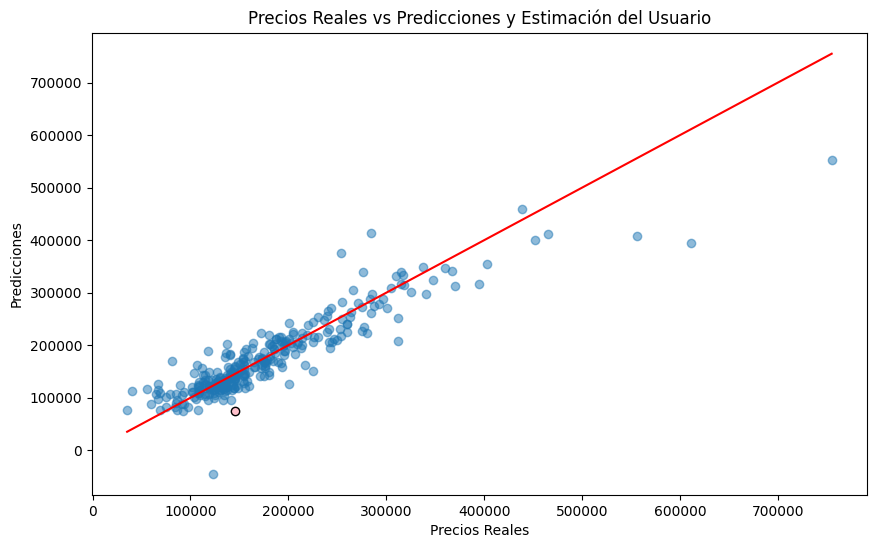

In [ ]:
# Gráfica de dispersión real vs predicción
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.scatter(y_train.iloc[0], predicted_price, color='pink', edgecolor='black', zorder=5)
plt.xlabel("Precios Reales")
plt.ylabel("Predicciones")
plt.title("Precios Reales vs Predicciones y Estimación del Usuario")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r')
plt.show()